In [1]:
import tensorflow_datasets as tfds

dataset,info=tfds.load('imdb_reviews/subwords8k',with_info=True,as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteVLA2WM/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteVLA2WM/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteVLA2WM/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [2]:

# Get the tokenizer
tokenizer = info.features['text'].encoder

In [3]:
buffer_size=10000
batch_size=256

train_data,test_data=dataset['train'],dataset['test']

train_dataset=train_data.shuffle(buffer_size)
train_dataset=train_dataset.padded_batch(batch_size)
test_dataset=test_data.padded_batch(batch_size)

In [4]:
import tensorflow as tf

# Hyperparameters
embedding_dim = 64
lstm_dim = 64
dense_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
epochs=10
history=model.fit(train_dataset,epochs=10,validation_data=test_dataset)


Epoch 1/10
98/98 [==============================] - 34s 268ms/step - loss: 0.6281 - accuracy: 0.6404 - val_loss: 0.6098 - val_accuracy: 0.7051
Epoch 2/10
98/98 [==============================] - 24s 247ms/step - loss: 0.3645 - accuracy: 0.8482 - val_loss: 0.3939 - val_accuracy: 0.8330
Epoch 3/10
98/98 [==============================] - 26s 260ms/step - loss: 0.3326 - accuracy: 0.8646 - val_loss: 0.4237 - val_accuracy: 0.8346
Epoch 4/10
98/98 [==============================] - 25s 252ms/step - loss: 0.2453 - accuracy: 0.9085 - val_loss: 0.4556 - val_accuracy: 0.8101
Epoch 5/10
98/98 [==============================] - 25s 257ms/step - loss: 0.2084 - accuracy: 0.9260 - val_loss: 0.4276 - val_accuracy: 0.8334
Epoch 6/10
98/98 [==============================] - 25s 255ms/step - loss: 0.4446 - accuracy: 0.8020 - val_loss: 0.5894 - val_accuracy: 0.6556
Epoch 7/10
98/98 [==============================] - 25s 253ms/step - loss: 0.4067 - accuracy: 0.8179 - val_loss: 0.5173 - val_accuracy: 0.7827

In [7]:
import matplotlib.pyplot as plt
def plot_graph(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

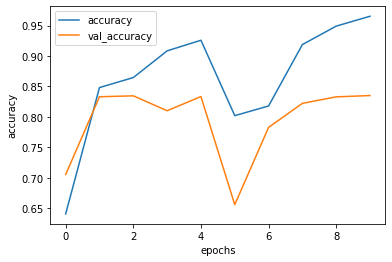

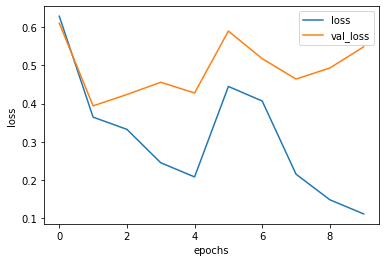

In [10]:
# Plot the accuracy and results 
plot_graph(history, "accuracy")
plot_graph(history, "loss")